##**THE SPARKS FOUNDATION** 
### TASK 2 - Prediction using Unsupervised ML (Level - Beginner)
* From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
* Use R or Python or perform this task
* Dataset : https://bit.ly/3kXTdox

\


####**Author: Urmi Sen** 
Department of Computer Science & Engineering,\
Rajshahi University of Engineering & Technology (RUET), Bangladesh\
Website: https://urmisen.github.io/website/ \
Linkedin: https://www.linkedin.com/in/urmi-sen-78a821149/ \
Email: urmisen1202@gmail.com

### Importing necessary libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets

Loading the dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Size of the dataset :**

In [3]:
df_iris.shape

(150, 4)

### **Checking the null values :**

In [4]:
# Checking the training data dose it has any null value or not
df_iris.isnull().any().describe()

count         4
unique        1
top       False
freq          4
dtype: object

As here unique == 1 , thus the dataset is unique and here is no null value in the Dataset so, we can now visualize our Data.

### Dataset Information

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### **Description of the dataset :**

In [6]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### **Exploratory Data Analysis**

#### Univariate Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


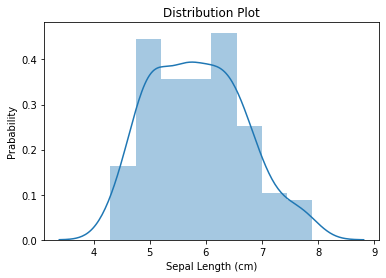

In [7]:
sns.distplot(df_iris['sepal length (cm)'])
plt.title('Distribution Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


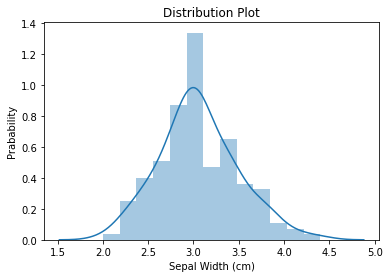

In [8]:
sns.distplot(df_iris['sepal width (cm)'])
plt.title('Distribution Plot')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


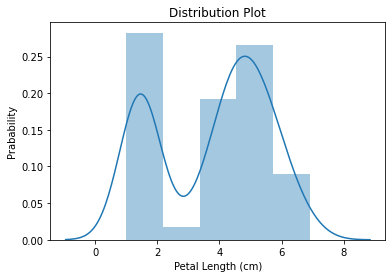

In [9]:
sns.distplot(df_iris['petal length (cm)'])
plt.title('Distribution Plot')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Prabability') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


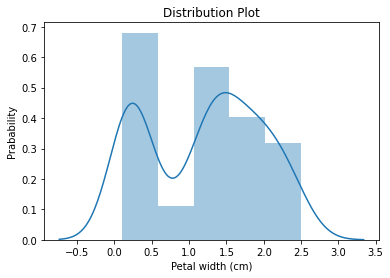

In [10]:
sns.distplot(df_iris['petal width (cm)'])
plt.title('Distribution Plot')
plt.xlabel('Petal width (cm)')
plt.ylabel('Prabability') 
plt.show()

#### **Multivariate Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


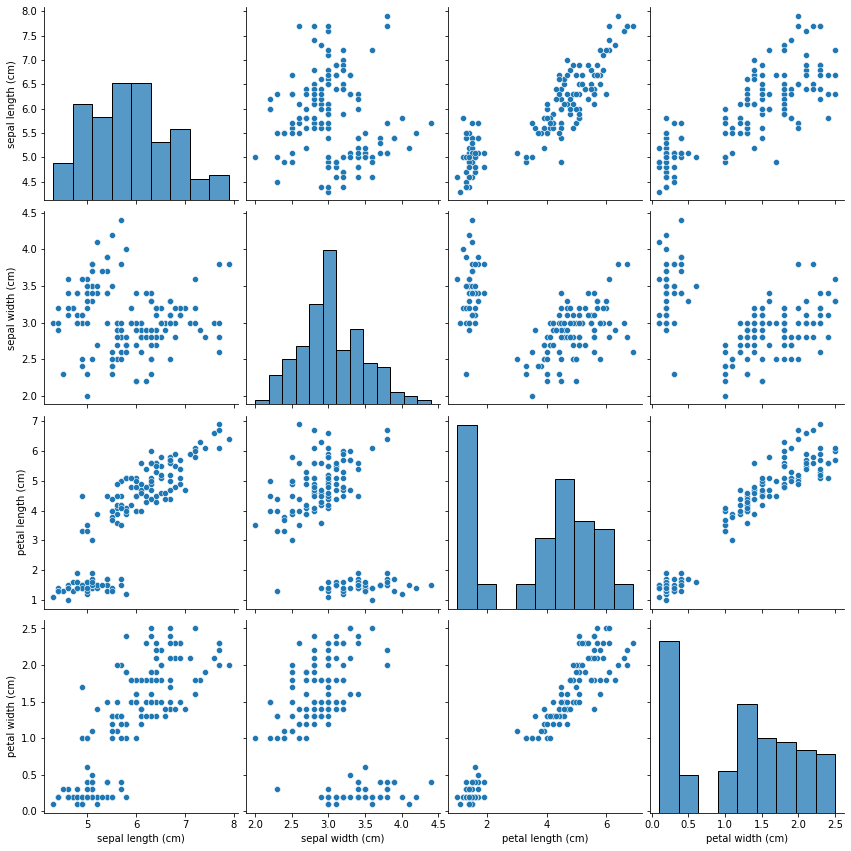

In [11]:
sns.pairplot(df_iris,size=3)

From the pairplot , it can be visually observed that there can be atleast 2 different clusters

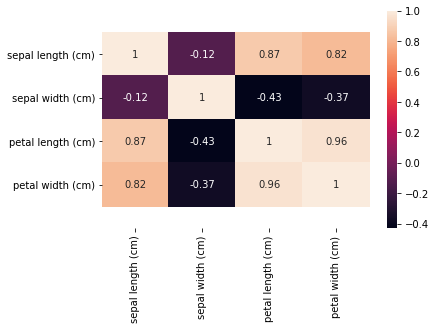

In [12]:
ax=sns.heatmap(df_iris.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

1. Positive correlation exist between-
* sepal length	and	petal length (0.87)	
* sepal length	and petal width (0.82)
* petal length	and petal width (0.96)

\

2. Negative correlation exist between-
* sepal length	and sepal width (- 0.12)
* petal length	and sepal width (- 0.43)
* petal width	and sepal width (- 0.37)



In [13]:
# Finding the optimum number of clusters for k-means classification
x = df_iris.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
sil_score=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

#### **Plotting the graph onto a line graph to observe the pattern**

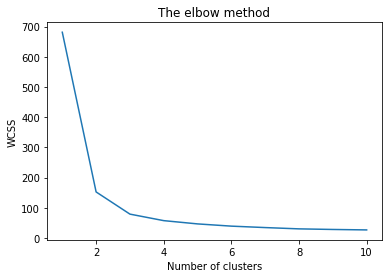

In [14]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the above graph we can say that the number of clusters can be taken as 3.
#### **Creating K-Means Classifier**

In [15]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### **Visualizing the cluster data**

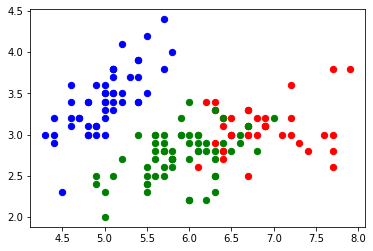

In [16]:
# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 40, c = 'green', label = 'Iris-virginica')

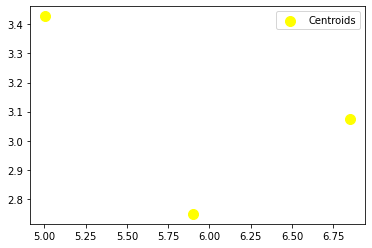

In [17]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#### **Now Combining both the above graphs together**

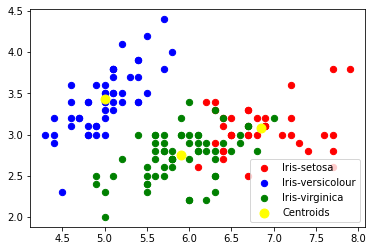

In [18]:
# Visualising the clusters 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 40, c = 'green', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'yellow', label = 'Centroids')

plt.legend()

Thus, 3 clusters are formed which can be seen from the above graph.

In [20]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


In [22]:
df_iris['labels']=kmeans.labels_

In [23]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [26]:
df_iris.groupby('labels').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
labels,,,,
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871
